In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVR 
from sklearn.svm import SVC

In [4]:
raw_data = pd.read_csv('../epi_r.csv')
raw_data_wr = raw_data.drop(['rating'], 1)

In [5]:
raw_data.loc[raw_data['rating'] > 3.5, 'rating_pos'] = 1
raw_data.loc[raw_data['rating'] < 3.5, 'rating_pos'] = 0

In [6]:
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
## take the most correlated with rating
## then, sort correlation btw features

cor_matrix = raw_data.corr().abs()
features_c = cor_matrix.unstack()

In [38]:
features_c['rating'].sort_values(ascending = False).head(32).index

Index(['rating', 'rating_pos', 'drink', 'alcoholic', 'house & garden', 'gin',
       'spirit', 'cocktail', 'cocktail party', 'bitters', 'bon appétit',
       'harpercollins', 'peanut free', 'soy free', 'liqueur', 'rum',
       'tree nut free', 'non-alcoholic', 'bake', 'condiment', 'roast', 'fall',
       'sauté', 'brandy', 'fortified wine', 'pernod', 'créme de cacao',
       'dinner', 'weelicious', 'chartreuse', 'kosher', 'lime juice'],
      dtype='object')

Correlation left max about 0.17 

### Taking 30 most correlated with outcome features and running SVM Regression model

In [35]:
Y = raw_data.rating
X = raw_data[['drink', 'alcoholic', 'house & garden', 'gin',
       'cocktail party', 'spirit', 'cocktail', 'bon appétit', 'harpercollins',
       'bitters', 'condiment', 'peanut free', 'soy free', 'liqueur', 'rum',
       'non-alcoholic', 'pickles', 'bake', 'tree nut free', 'fall', 'roast',
       'chartreuse', 'créme de cacao', 'sauté', 'weelicious', 'lime juice',
       'kosher', 'thanksgiving', 'brandy', 'high fiber']]

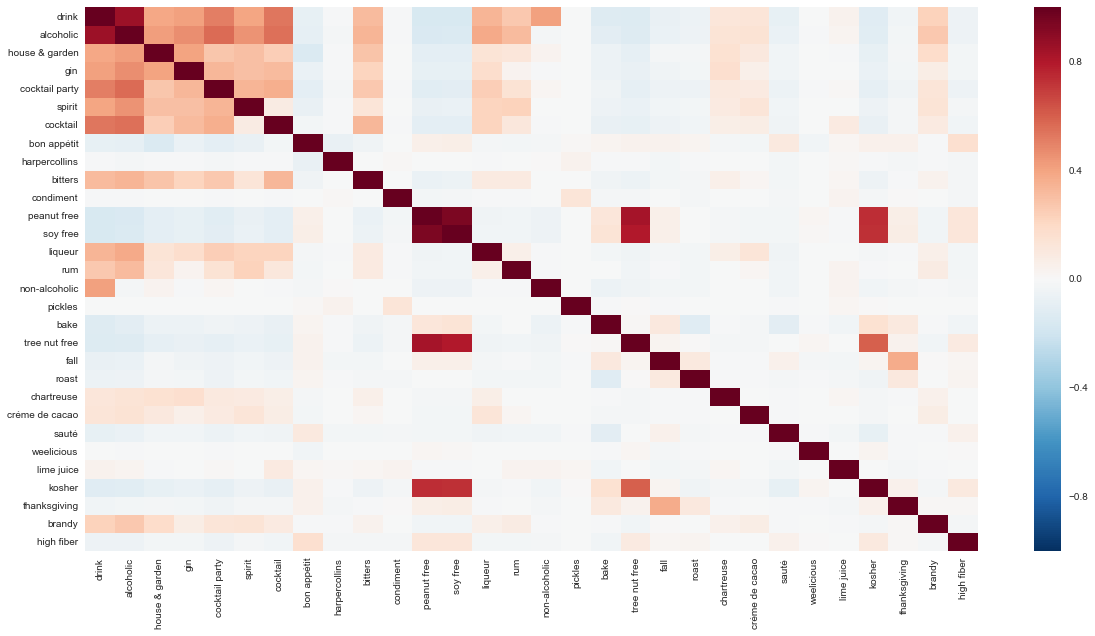

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr())
plt.show()

In [37]:
X.describe()

,drink,alcoholic,house & garden,gin,cocktail party,spirit,cocktail,bon appétit,harpercollins,bitters,...,roast,chartreuse,créme de cacao,sauté,weelicious,lime juice,kosher,thanksgiving,brandy,high fiber
count,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,0.054209,0.041642,0.022890,0.011271,0.057550,0.010922,0.018951,0.466537,0.006034,0.006334,...,0.065829,0.000898,0.001047,0.101935,0.001646,0.006633,0.307949,0.072711,0.013465,0.050519
std,0.226435,0.199774,0.149558,0.105566,0.232897,0.103937,0.136354,0.498891,0.077448,0.079333,...,0.247989,0.029948,0.032346,0.302570,0.040535,0.081173,0.461657,0.259668,0.115258,0.219018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
svr = SVR(C=1)
#svr.fit(X,Y)

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5, verbose=2 )

[CV]  ................................................................
[CV] ................................................. , total=   9.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


[CV] ................................................. , total=   9.0s
[CV]  ................................................................
[CV] ................................................. , total=   8.7s
[CV]  ................................................................
[CV] ................................................. , total=   8.8s
[CV]  ................................................................
[CV] ................................................. , total=   8.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.8s finished


array([ 0.00675179,  0.001101  ,  0.00955852,  0.02671824,  0.01371572])

Not impressed. 

### Using SVM classifier 

In [29]:
Y = raw_data.rating_pos
svc = SVC()

In [34]:
cross_val_score(svc, X, Y, cv=5)

array([ 0.80279232,  0.80329095,  0.8032419 ,  0.80773067,  0.80673317])

Sweet.

### Drop / code depo